## Grundlagen des maschinellen Lernens (2023/24)

## **Aufgabenblatt 2**

**Abgabetermin: Mittwoch, 6. Dezember 2023**

Bitte bearbeiten Sie die Aufgaben im vorliegenden Jupyter-Notebook. Laden Sie das resultierende ipynb-File in ILIAS hoch.

## Aufgabe 1

Gegeben sei die folgendermaßen erzeugte Menge von Datenpunkte:

In [1]:
import numpy as np

np.random.seed(42) 
N = 50
x = np.random.rand(N, 1)  
y = np.sin(10 * x) + 0.1 * np.random.randn(N, 1)

Die durch den folgende Code erzeugte Graphik veranschaulicht die Anordnung der Datenpunkte.

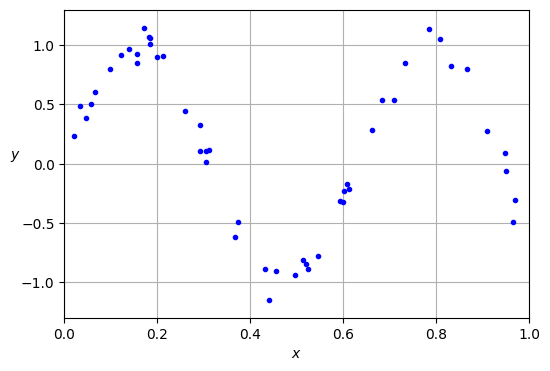

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(x, y, "b.")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 1, -1.3, 1.3])
plt.grid()
plt.show()

Teilen Sie die Datenpunkte in eine Trainings- und eine Validierungsmenge auf, indem Sie jeden zweiten Datenpunkt der Validierungsmenge zuschlagen.

Modellieren Sie die Trainingsdaten mittels linearer Regression unter der Merkmalstransformation $\phi=(\phi_1,\dots,\phi_r)$, wobei die Funktion $\phi_i$, eine radiale Basisfunktion mit Zentrum $m_i$ und Weitenparameter $b$, folgendermaßen definiert ist:

$$
\displaystyle
\phi_i(x)~=~\mathrm{exp}\bigl(-\biggl(\frac{x-m_i}{b}\biggr)^2\bigr)
$$

Dabei sei $r=15$ und die $m_i$'s seien in gleichen Abständen über das Intervall $[0,1]$ verteilt, mit $m_1=0$ und $m_{15}=1$.

Wenden Sie lineare Regression mit Ridge-Regularisierung auf die transformierten Daten an.
Nutzen Sie dazu das `Ridge`-Modell aus Scikit-Learn mit der Regularisierungsstärke $0.01$ (Parameter `alpha`) und dem Solver `cholesky`.

Ermitteln Sie denjenigen Wert für $b$, für den das berechnete Modell den geringsten Fehler auf den Validierungsdaten aufweist. 
Testen Sie dazu die ersten hundert Vielfachen von $0.01$ als mögliche Werte für $b$.
Verwenden Sie die Funktion `mean_squared_error` aus Scikit-Learn zur Berechnung des Fehlers.
Erzeugen Sie einen Plot des Fehlerwerts in Abhängigkeit von $b$.

Plotten Sie für den ermittelten besten Wert von $b$ die durch das zugehörige Modell generierte Prädiktionskurve über die graphische Darstellung der Originaldatenpunkte.

In [3]:
# split the data only using index slicing
X_train = x[::2]
X_val = x[1::2]

y_train = y[::2]
y_val = y[1::2]

In [4]:
# feature transformation (Gaussian)
def rbf_gaussian_transformation(X,r,b):
    phi_X = []
    m_list = list(np.linspace(0, 1, r))
    
    for item in X:
        in_brac = np.vstack([- ((item - m) / b)**2 for m in m_list])
        phi_item = np.concatenate(np.exp(in_brac), axis=0)
        phi_X.append(phi_item)

    return phi_X

In [5]:
# b-value to be tested, the one generated min MSE is our goal
b_list = list(np.linspace(0, 1, 101))[1:]  # avoid b==0

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge(alpha=0.01,solver='cholesky')

# list of (b_i, MSE_i) 
b_MSE = []

for b in b_list:
    # feature transformation with current b-value
    phi_X_train = rbf_gaussian_transformation(X=X_train,r=15,b=b)
    phi_X_val = rbf_gaussian_transformation(X=X_val,r=15,b=b)

    # train the classifier and get prediction of transformed X_val 
    clf.fit(phi_X_train,y_train)
    y_val_pred = clf.predict(phi_X_val)

    # update (b, MSE)-tuple list after testing each b-value
    b_MSE.append((b,mean_squared_error(y_val_pred, y_val)))

In [7]:
b_min_MSE = min(b_MSE, key=lambda x: x[1])

print("geringsten Fehler (MSE): ", b_min_MSE[1])
print("dementsprechender b-Wert:", b_min_MSE[0])

geringsten Fehler (MSE):  0.021515561391535227
dementsprechender b-Wert: 0.32


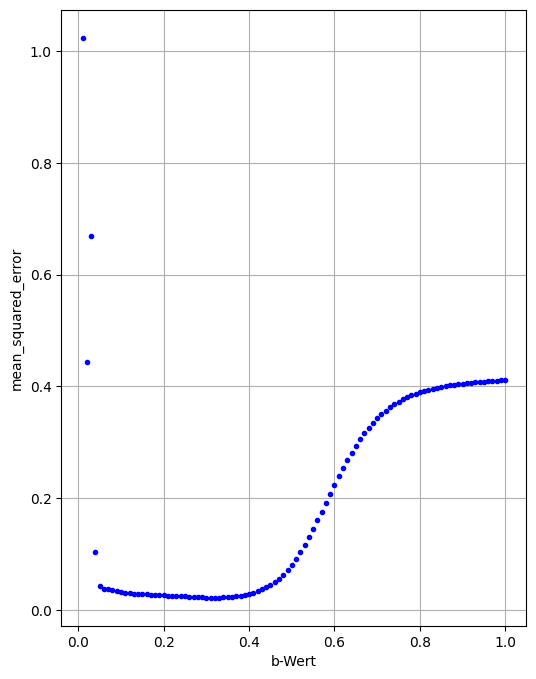

In [8]:
# plot relation of b=0.01~1.00 and error rate
b_values = [tup[0] for tup in b_MSE]
MSEs = [tup[1] for tup in b_MSE]

plt.figure(figsize=(6, 8))
plt.plot(b_values, MSEs, "b.")
plt.xlabel("b-Wert")
plt.ylabel("mean_squared_error", rotation=90)
plt.grid()
plt.show()

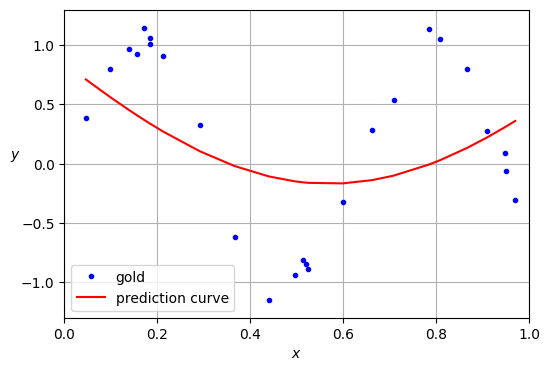

In [54]:
# sorting so that the prediction points can be connected as a 
sorted_indices = np.argsort(np.concatenate(X_val))
sorted_X_val = np.array(X_val)[sorted_indices]
sorted_y_val_pred = np.array(y_val_pred)[sorted_indices]

# compare predictions with gold labels when the best b-value is used for transformation
plt.figure(figsize=(6, 4))
plt.plot(X_val, y_val, "b.", label="gold")
plt.plot(sorted_X_val, sorted_y_val_pred, "r", linestyle='-', label='prediction curve')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 1, -1.3, 1.3])
plt.legend()
plt.grid()
plt.show()

## Aufgabe 2

Ziel dieser Aufgabe ist die Rekonstruktion des auf den Vorlesungsfolien im Abschnitt ‘Logistic regression/Feature transformations’ anhand der Abbildung 17.12 aus Barber (2012) illustrierten binären Klassifikationsbeispiels.
Verwenden Sie dazu die folgendermaßen erzeugten Daten.

In [1]:
import numpy as np

count = 25
cov = [[5, 0], [0, 5]]
mean = [[4, 5], [-5,4], [-4,-4], [4,-5]]

np.random.seed(42) 
x = [np.random.multivariate_normal(m, cov, count) for m in mean]
X = np.concatenate(x)

classes = [0, 1, 0, 1]
cl = [np.full((count), c) for c in classes]
y = np.concatenate(cl)

Die nachfolgend erzeugte Graphik illustriert die Anordnung der Datenpunkte sowie ihre Klassenzugehörigkeit.

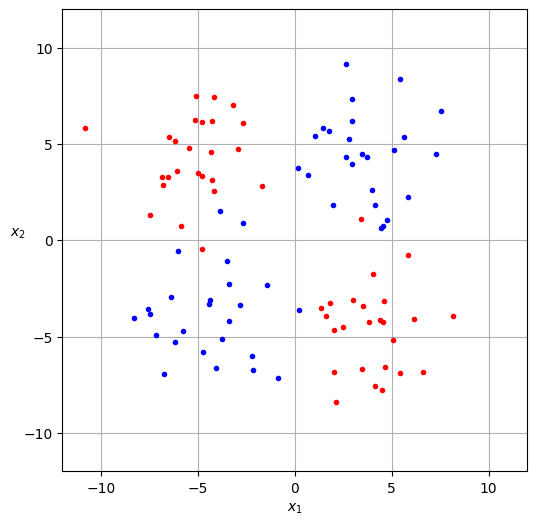

In [2]:
import matplotlib.pyplot as plt

plotsect = 12
plt.figure(figsize=(6, 6))
dotcolors = "br"
for i, xi in enumerate(x):
    plt.plot(xi[:,0], xi[:,1], dotcolors[classes[i]]+".")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-plotsect, plotsect, -plotsect, plotsect])
plt.grid()
plt.show()

Konstruieren Sie einen Klassifikator für die Daten unter Verwendung des Modells `LogisticRegression` aus Scikit-learn.
Transformieren Sie vorher die Daten in geeigneter Weise.

Stellen Sie die “Höhenlinien” der Klassenzugehörigkeitswahrscheinlichkeiten graphisch im Plott der Datenpunkte dar.
Sie können sich dabei an dem `matplotlib`-Code aus dem Notebook zu Kaptitel 4 von Gérons Buch, Abschnitt ‘Softmax Regression’, orientieren, der zur Erzeugung der Abbildung 4-25 im Buch dient. (Die resultierende Graphik sollte eine gewisse Ähnlichkeit mit der oben erwähnten Abbildung aus Barbers Buch aufweisen.)